In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
#arrays replicas
cfp1=np.fromfile('CFPC8', sep=',')
rfp1=np.fromfile('RFPC8', sep=',')
yfp1=np.fromfile('YFPC8', sep=',')
od1=np.fromfile('ODC8', sep=',')
cfp2=np.fromfile('CFPC9', sep=',')
rfp2=np.fromfile('RFPC9', sep=',')
yfp2=np.fromfile('YFPC9', sep=',')
od2=np.fromfile('ODC9', sep=',')
cfp3=np.fromfile('CFPC10', sep=',')
rfp3=np.fromfile('RFPC10', sep=',')
yfp3=np.fromfile('YFPC10', sep=',')
od3=np.fromfile('ODC10', sep=',')
cfp4=np.fromfile('CFPC11', sep=',')
rfp4=np.fromfile('RFPC11', sep=',')
yfp4=np.fromfile('YFPC11', sep=',')
od4=np.fromfile('ODC11', sep=',')
cfp5=np.fromfile('CFPC12', sep=',')
rfp5=np.fromfile('RFPC12', sep=',')
yfp5=np.fromfile('YFPC12', sep=',')
od5=np.fromfile('ODC12', sep=',')
cfp6=np.fromfile('CFPD8', sep=',')
rfp6=np.fromfile('RFPD8', sep=',')
yfp6=np.fromfile('YFPD8', sep=',')
od6=np.fromfile('ODD8', sep=',')
cfp7=np.fromfile('CFPD9', sep=',')
rfp7=np.fromfile('RFPD9', sep=',')
yfp7=np.fromfile('YFPD9', sep=',')
od7=np.fromfile('ODD9', sep=',')
cfp8=np.fromfile('CFPD10', sep=',')
rfp8=np.fromfile('RFPD10', sep=',')
yfp8=np.fromfile('YFPD10', sep=',')
od8=np.fromfile('ODD10', sep=',')
cfp9=np.fromfile('CFPD11', sep=',')
rfp9=np.fromfile('RFPD11', sep=',')
yfp9=np.fromfile('YFPD11', sep=',')
od9=np.fromfile('ODD11', sep=',')
cfp10=np.fromfile('CFPD12', sep=',')
rfp10=np.fromfile('RFPD12', sep=',')
yfp10=np.fromfile('YFPD12', sep=',')
od10=np.fromfile('ODD12', sep=',')
tt=np.fromfile('t', sep=',')

#Promedios controles glucosa
cfpc=np.fromfile('pcgCFP', sep=',')
rfpc=np.fromfile('pcgRFP', sep=',')
yfpc=np.fromfile('pcgYFP', sep=',')
odc=np.fromfile('pcgOD', sep=',')

#Promedio arrays y desv estándar
cfpp=np.fromfile('pplsgCFP', sep=',')
rfpp=np.fromfile('pplsgRFP', sep=',')
yfpp=np.fromfile('pplsgYFP', sep=',')
odp=np.fromfile('pplsgOD', sep=',')
print(cfpp.shape)
print(rfpp.shape)
print(yfpp.shape)
print(odp.shape)
print(tt.shape)

(97,)
(97,)
(97,)
(97,)
(97,)


In [3]:
#Funciones para ajuste Gompertz
def F_sigma(t, A, um,l):
    return ((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1))))

def Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([0,0,0],[3,1,300])):
        Y_fit={}

        z,_=curve_fit(func,xdata[init:end], ydata[init:end],bounds=ParamBounds)

        print(z)

        evalF=func(xdata,z[0],z[1],z[2])

        plt.plot(xdata, ydata, '.',xdata, evalF, '-')

        plt.title('')

        plt.show()

        Y_fit=evalF,z

        return(Y_fit)

Min OD = 8.275000e-02
[  2.27987016e+00   1.00649666e-02   1.55693371e+02]


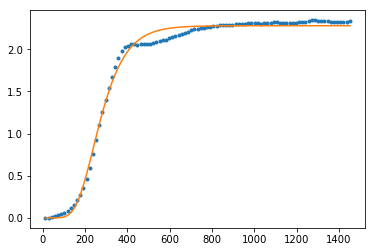

A=2.279870e+00
um=1.006497e-02
l=1.556934e+02
Tm=2.390237e+02
doubpe=6.886731e+01
ext=1.377346e+02
Tfinal=3.767584e+02


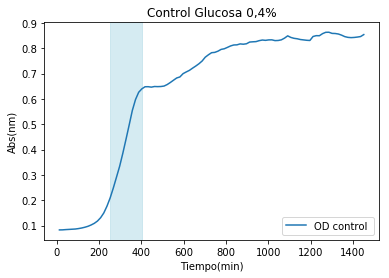

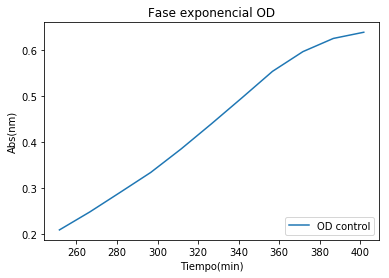

In [7]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#control glucosa
yc = np.log(odc)-np.log(np.min(odc))
print('Min OD = %e'%((np.min(odc))))
evaly, params=Function_fit(tt,yc,0,-1)
Ac = params[0]
umc=params[1]
lc=params[2]
print('A=%e'%(Ac))
print('um=%e'%(umc))
print('l=%e'%(lc))

#Cálculo datos para determinar extensión de la fase exponencial
tmc=((Ac/(np.exp(1)*umc))+lc)
print('Tm=%e'%(tmc))
t2c=((np.log(2))/umc)
print('doubpe=%e'%(t2c))
extdpc=2*t2c
print('ext=%e'%extdpc)
ttotc=tmc+extdpc
print('Tfinal=%e'%ttotc)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[16]
y2=tt[26]
plt.figure()
plt.title('Control Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odc,label='OD control ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[16:27],odc[16:27],label='OD control')
plt.legend(loc='lower right')

Min OD = 8.340000e-02
[  2.37254921e+00   1.05578438e-02   1.76137357e+02]


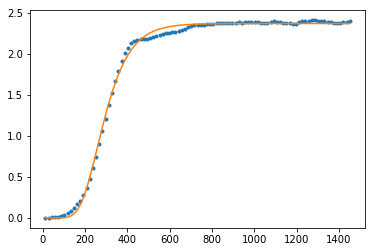

A=2.372549e+00
um=1.055784e-02
l=1.761374e+02
Tm=2.588069e+02
doubpe=6.565234e+01
ext=1.313047e+02
Tfinal=3.901116e+02


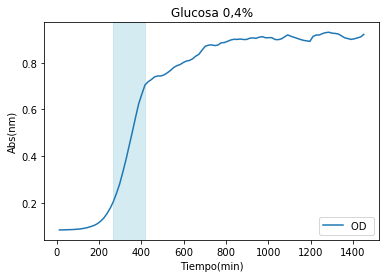

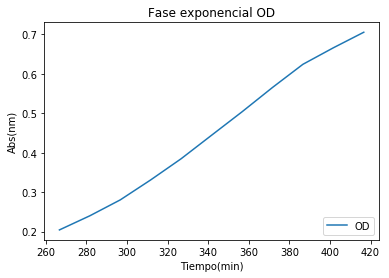

In [8]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#Promedio
y = np.log(odp)-np.log(np.min(odp))
print('Min OD = %e'%((np.min(odp))))
evaly, params=Function_fit(tt,y,0,-1)
A = params[0]
um=params[1]
l=params[2]
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))

#Cálculo datos para determinar extensión de la fase exponencial
tm=((A/(np.exp(1)*um))+l)
print('Tm=%e'%(tm))
t2=((np.log(2))/um)
print('doubpe=%e'%(t2))
extdp=2*t2
print('ext=%e'%extdp)
ttot=tm+extdp
print('Tfinal=%e'%ttot)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[17]
y2=tt[27]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odp,label='OD ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[17:28],odp[17:28],label='OD')
plt.legend(loc='lower right')

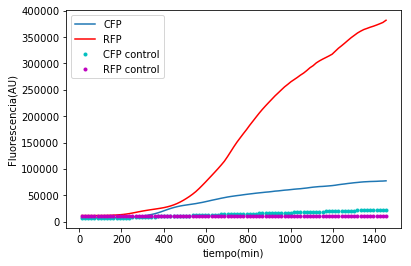

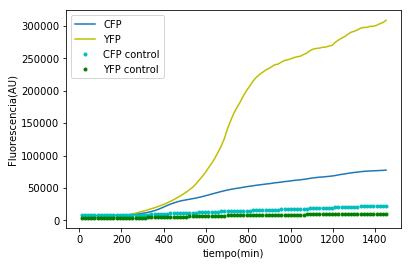

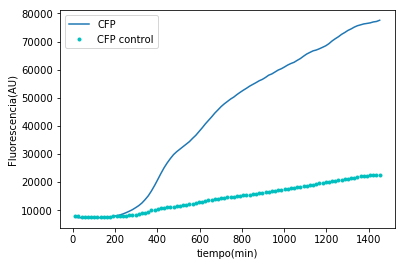

In [9]:
#Fluorescencia vs tiempo
plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,rfpp,'r',label='RFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.plot(tt,rfpc,'m.',label='RFP control')
plt.legend(loc='upper left')

plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,yfpp,'y',label='YFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.plot(tt,yfpc,'g.',label='YFP control')
plt.legend(loc='upper left')
plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.legend(loc='upper left')

[  2.41863425e+00   9.08098399e-03   1.49133311e+02]


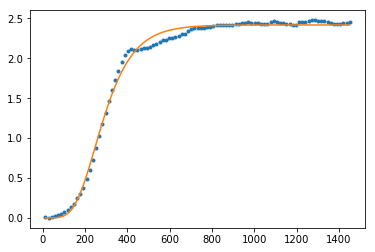

A=2.418634e+00
um=9.080984e-03
l=1.491333e+02
Tm=2.471145e+02
doubpe=7.632952e+01
ext=1.526590e+02
Tfinal=3.997736e+02


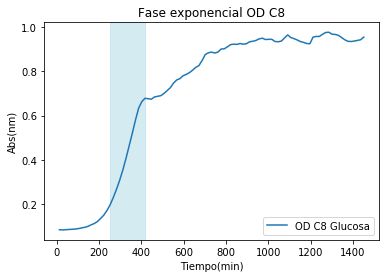

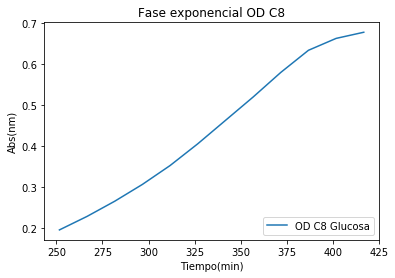

In [12]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#C8
y1 = np.log(od1)-np.log(np.min(od1))
evaly, params=Function_fit(tt,y1,0,-1)
A1 = params[0]
um1=params[1]
l1=params[2]
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))

#Cálculo datos para determinar extensión de la fase exponencial
tm1=((A1/(np.exp(1)*um1))+l1)
print('Tm=%e'%(tm1))
t21=((np.log(2))/um1)
print('doubpe=%e'%(t21))
extdp1=2*t21
print('ext=%e'%extdp1)
ttot1=tm1+extdp1
print('Tfinal=%e'%ttot1)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[16]
y2=tt[27]
plt.figure()
plt.title('Fase exponencial OD C8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od1,label='OD C8 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo A3
plt.figure()
plt.title('Fase exponencial OD C8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[16:28],od1[16:28],label='OD C8 Glucosa')
plt.legend(loc='lower right')

[  2.42654878e+00   1.37047313e-02   1.65883632e+02]


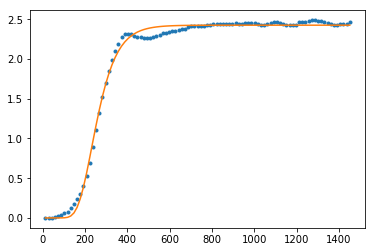

A=2.426549e+00
um=1.370473e-02
l=1.658836e+02
Tm=2.310201e+02
doubpe=5.057722e+01
ext=1.264430e+02
Tfinal=3.574631e+02


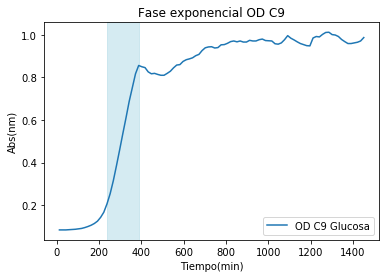

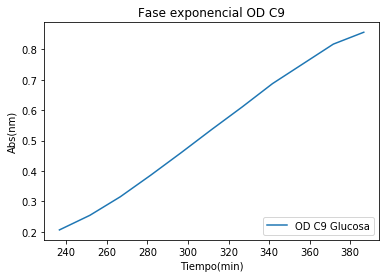

In [16]:
#C9
plt.figure()
y2 = np.log(od2)-np.log(np.min(od2))
evaly, params=Function_fit(tt,y2,0,-1)
A2 = params[0]
um2=params[1]
l2=params[2]
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))

#Cálculo datos para determinar extensión de la fase exponencial
tm2=((A2/(np.exp(1)*um2))+l2)
print('Tm=%e'%(tm2))
t22=((np.log(2))/um2)
print('doubpe=%e'%(t22))
extdp2=2.5*t22
print('ext=%e'%extdp2)
ttot2=tm2+extdp2
print('Tfinal=%e'%ttot2)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[15]
y2=tt[25]
plt.figure()
plt.title('Fase exponencial OD C9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od2,label='OD C9 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD C9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[15:26],od2[15:26],label='OD C9 Glucosa')
plt.legend(loc='lower right')

[  2.43970566e+00   1.18525322e-02   1.91195809e+02]


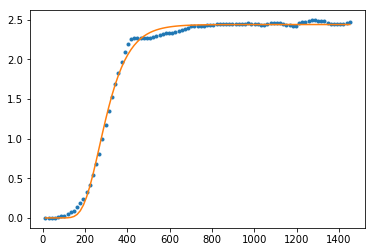

A=2.439706e+00
um=1.185253e-02
l=1.911958e+02
Tm=2.669195e+02
doubpe=5.848094e+01
ext=1.169619e+02
Tfinal=3.838814e+02


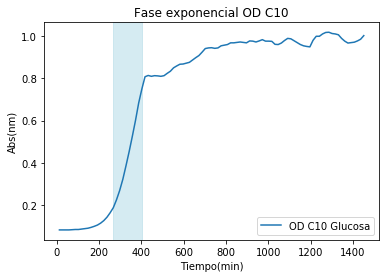

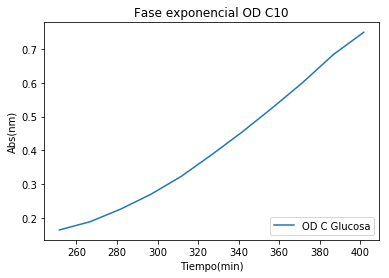

In [18]:
#C10
plt.figure()
y3= np.log(od3)-np.log(np.min(od3))
evaly, params=Function_fit(tt,y3,0,-1)
A3 = params[0]
um3=params[1]
l3=params[2]
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))

#Cálculo datos para determinar extensión de la fase exponencial
tm3=((A3/(np.exp(1)*um3))+l3)
print('Tm=%e'%(tm3))
t23=((np.log(2))/um3)
print('doubpe=%e'%(t23))
extdp3=2*t23
print('ext=%e'%extdp3)
ttot3=tm3+extdp3
print('Tfinal=%e'%ttot3)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[17]
y2=tt[26]
plt.figure()
plt.title('Fase exponencial OD C10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od3,label='OD C10 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo A3
plt.figure()
plt.title('Fase exponencial OD C10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[16:27],od3[16:27],label='OD C Glucosa')
plt.legend(loc='lower right')

[  2.49323921e+00   1.16670072e-02   1.87547794e+02]


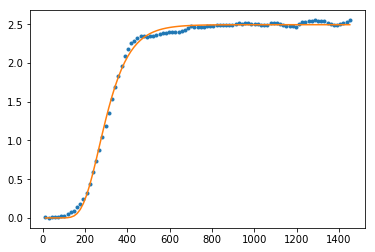

A=2.493239e+00
um=1.166701e-02
l=1.875478e+02
Tm=2.661636e+02
doubpe=5.941088e+01
ext=1.188218e+02
Tfinal=3.849854e+02


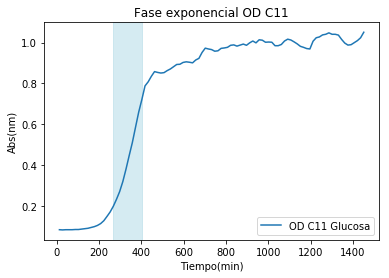

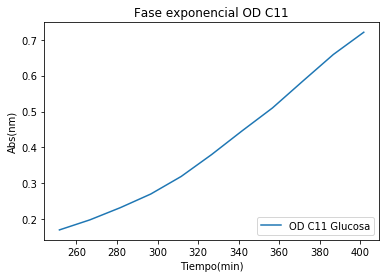

In [20]:
#C11
plt.figure()
y4 = np.log(od4)-np.log(np.min(od4))
evaly, params=Function_fit(tt,y4,0,-1)
A4 = params[0]
um4=params[1]
l4=params[2]
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))

#Cálculo datos para determinar extensión de la fase exponencial
tm4=((A4/(np.exp(1)*um4))+l4)
print('Tm=%e'%(tm4))
t24=((np.log(2))/um4)
print('doubpe=%e'%(t24))
extdp4=2*t24
print('ext=%e'%extdp4)
ttot4=tm4+extdp4
print('Tfinal=%e'%ttot4)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[17]
y2=tt[26]
plt.figure()
plt.title('Fase exponencial OD C11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od4,label='OD C11 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD C11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[16:27],od4[16:27],label='OD C11 Glucosa')
plt.legend(loc='lower right')

[  2.47235212e+00   9.85357709e-03   1.70068252e+02]


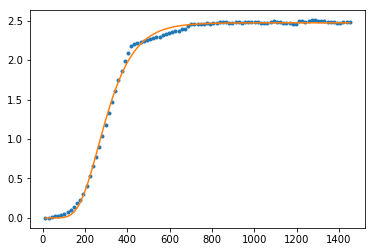

A=2.472352e+00
um=9.853577e-03
l=1.700683e+02
Tm=2.623725e+02
doubpe=7.034473e+01
ext=1.406895e+02
Tfinal=4.030620e+02


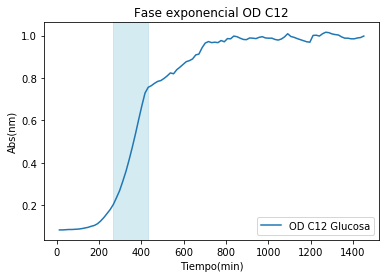

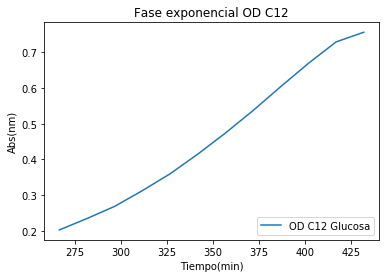

In [25]:
#C12
plt.figure()
y5 = np.log(od5)-np.log(np.min(od5))
evaly, params=Function_fit(tt,y5,0,-1)
A5 = params[0]
um5=params[1]
l5=params[2]
print('A=%e'%(A5))
print('um=%e'%(um5))
print('l=%e'%(l5))

#Cálculo datos para determinar extensión de la fase exponencial
tm5=((A5/(np.exp(1)*um5))+l5)
print('Tm=%e'%(tm5))
t25=((np.log(2))/um5)
print('doubpe=%e'%(t25))
extdp5=2*t25
print('ext=%e'%extdp5)
ttot5=tm5+extdp5
print('Tfinal=%e'%ttot5)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[17]
y2=tt[28]
plt.figure()
plt.title('Fase exponencial OD C12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od5,label='OD C12 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD C12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[17:29],od5[17:29],label='OD C12 Glucosa')
plt.legend(loc='lower right')

[  2.45144232e+00   1.11574405e-02   1.47871465e+02]


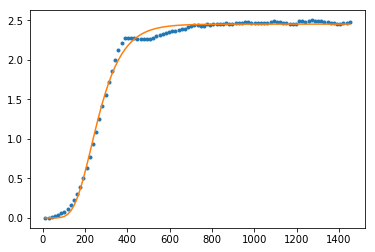

A=2.451442e+00
um=1.115744e-02
l=1.478715e+02
Tm=2.286996e+02
doubpe=6.212421e+01
ext=1.242484e+02
Tfinal=3.529480e+02


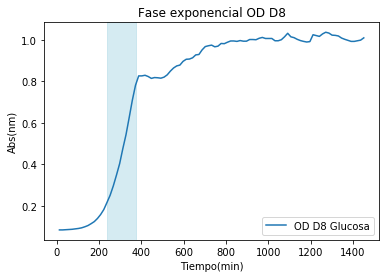

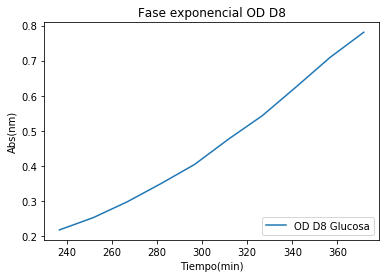

In [28]:
#D8
plt.figure()
y6 = np.log(od6)-np.log(np.min(od6))
evaly, params=Function_fit(tt,y6,0,-1)
A6 = params[0]
um6=params[1]
l6=params[2]
print('A=%e'%(A6))
print('um=%e'%(um6))
print('l=%e'%(l6))

#Cálculo datos para determinar extensión de la fase exponencial
tm6=((A6/(np.exp(1)*um6))+l6)
print('Tm=%e'%(tm6))
t26=((np.log(2))/um6)
print('doubpe=%e'%(t26))
extdp6=2*t26
print('ext=%e'%extdp6)
ttot6=tm6+extdp6
print('Tfinal=%e'%ttot6)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[15]
y2=tt[24]
plt.figure()
plt.title('Fase exponencial OD D8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od6,label='OD D8 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD D8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[15:25],od6[15:25],label='OD D8 Glucosa')
plt.legend(loc='lower right')

[  2.29998697e+00   1.08361729e-02   1.82257921e+02]


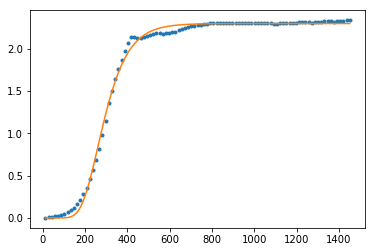

A=2.299987e+00
um=1.083617e-02
l=1.822579e+02
Tm=2.603406e+02
doubpe=6.396605e+01
ext=1.279321e+02
Tfinal=3.882727e+02


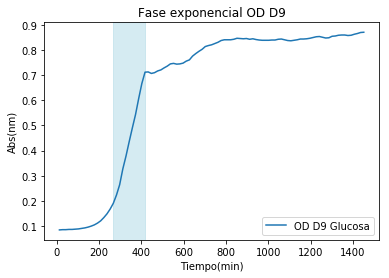

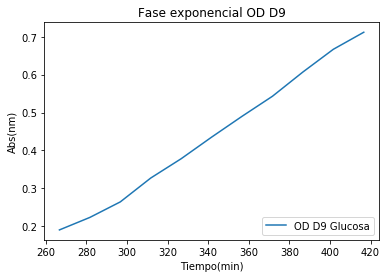

In [30]:
#D9
plt.figure()
y7 = np.log(od7)-np.log(np.min(od7))
evaly, params=Function_fit(tt,y7,0,-1)
A7 = params[0]
um7=params[1]
l7=params[2]
print('A=%e'%(A7))
print('um=%e'%(um7))
print('l=%e'%(l7))

#Cálculo datos para determinar extensión de la fase exponencial
tm7=((A7/(np.exp(1)*um7))+l7)
print('Tm=%e'%(tm7))
t27=((np.log(2))/um7)
print('doubpe=%e'%(t27))
extdp7=2*t27
print('ext=%e'%extdp7)
ttot7=tm7+extdp7
print('Tfinal=%e'%ttot7)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[17]
y2=tt[27]
plt.figure()
plt.title('Fase exponencial OD D9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od7,label='OD D9 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD D9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[17:28],od7[17:28],label='OD D9 Glucosa')
plt.legend(loc='lower right')

[  2.45144080e+00   1.16979833e-02   1.97515956e+02]


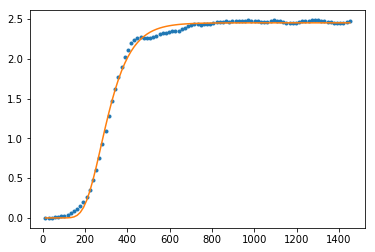

A=2.451441e+00
um=1.169798e-02
l=1.975160e+02
Tm=2.746091e+02
doubpe=5.925356e+01
ext=1.185071e+02
Tfinal=3.931163e+02


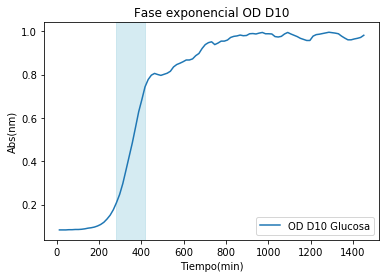

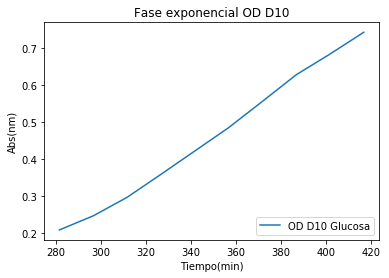

In [32]:
#D10
plt.figure()
y8= np.log(od8)-np.log(np.min(od8))
evaly, params=Function_fit(tt,y8,0,-1)
A8 = params[0]
um8=params[1]
l8=params[2]
print('A=%e'%(A8))
print('um=%e'%(um8))
print('l=%e'%(l8))

#Cálculo datos para determinar extensión de la fase exponencial
tm8=((A8/(np.exp(1)*um8))+l8)
print('Tm=%e'%(tm8))
t28=((np.log(2))/um8)
print('doubpe=%e'%(t28))
extdp8=2*t28
print('ext=%e'%extdp8)
ttot8=tm8+extdp8
print('Tfinal=%e'%ttot8)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[18]
y2=tt[27]
plt.figure()
plt.title('Fase exponencial OD D10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od8,label='OD D10 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD D10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:28],od8[18:28],label='OD D10 Glucosa')
plt.legend(loc='lower right')

[  2.35840567e+00   1.24669763e-02   2.17634960e+02]


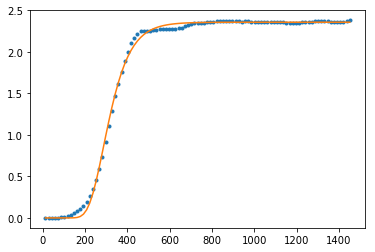

A=2.358406e+00
um=1.246698e-02
l=2.176350e+02
Tm=2.872275e+02
doubpe=5.559866e+01
ext=1.389967e+02
Tfinal=4.262242e+02


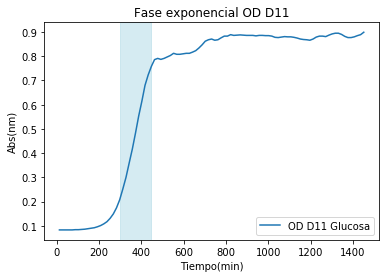

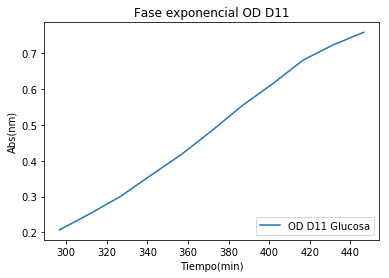

In [37]:
#D11
plt.figure()
y9= np.log(od9)-np.log(np.min(od9))
evaly, params=Function_fit(tt,y9,0,-1)
A9 = params[0]
um9=params[1]
l9=params[2]
print('A=%e'%(A9))
print('um=%e'%(um9))
print('l=%e'%(l9))

#Cálculo datos para determinar extensión de la fase exponencial
tm9=((A9/(np.exp(1)*um9))+l9)
print('Tm=%e'%(tm9))
t29=((np.log(2))/um9)
print('doubpe=%e'%(t29))
extdp9=2.5*t29
print('ext=%e'%extdp9)
ttot9=tm9+extdp9
print('Tfinal=%e'%ttot9)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[29]
plt.figure()
plt.title('Fase exponencial OD D11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od9,label='OD D11 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD D11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[19:30],od9[19:30],label='OD D11 Glucosa')
plt.legend(loc='lower right')

[  1.73569079e+00   7.06791839e-03   2.64254976e+02]


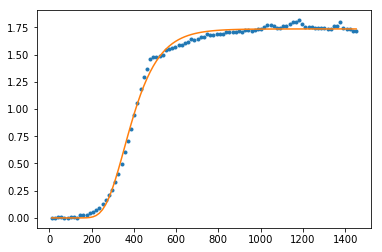

A=1.735691e+00
um=7.067918e-03
l=2.642550e+02
Tm=3.545963e+02
doubpe=9.806949e+01
ext=1.961390e+02
Tfinal=5.507353e+02


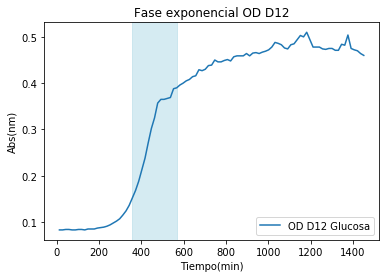

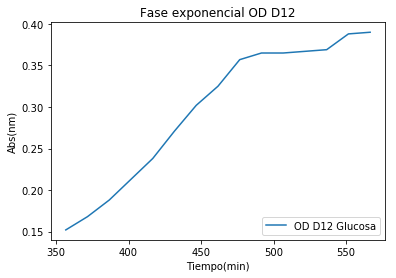

In [40]:
#D12
plt.figure()
y10= np.log(od10)-np.log(np.min(od10))
evaly, params=Function_fit(tt,y10,0,-1)
A10= params[0]
um10=params[1]
l10=params[2]
print('A=%e'%(A10))
print('um=%e'%(um10))
print('l=%e'%(l10))

#Cálculo datos para determinar extensión de la fase exponencial
tm10=((A10/(np.exp(1)*um10))+l10)
print('Tm=%e'%(tm10))
t210=((np.log(2))/um10)
print('doubpe=%e'%(t210))
extdp10=2*t210
print('ext=%e'%extdp10)
ttot10=tm10+extdp10
print('Tfinal=%e'%ttot10)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[23]
y2=tt[37]
plt.figure()
plt.title('Fase exponencial OD D12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od10,label='OD D12 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD D12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[23:38],od10[23:38],label='OD D12 Glucosa')
plt.legend(loc='lower right')

In [45]:
#Selección de datos en arrays, según lo determinado
o=odp[17:28]
t=tt[17:28]
cp=cfpp[17:28]
rp=rfpp[17:28]
yp=yfpp[17:28]

#C8
o1=od1[16:28]
c1=cfp1[16:28]
r1=rfp1[16:28]
y1=yfp1[16:28]

#C9
o2=od2[15:26]
c2=cfp2[15:26]
r2=rfp2[15:26]
y2=yfp2[15:26]

#C10
o3=od3[17:27]
c3=cfp3[17:27]
r3=rfp3[17:27]
y3=yfp3[17:27]

#C11
o4=od4[17:27]
c4=cfp4[17:27]
r4=rfp4[17:27]
y4=yfp4[17:27]

#C12
o5=od5[17:29]
c5=cfp5[17:29]
r5=rfp5[17:29]
y5=yfp5[17:29]

#D8
o6=od6[15:25]
c6=cfp6[15:25]
r6=rfp6[15:25]
y6=yfp6[15:25]

#D9
o7=od7[17:28]
c7=cfp7[17:28]
r7=rfp7[17:28]
y7=yfp7[17:28]

#D10
o8=od8[18:28]
c8=cfp8[18:28]
r8=rfp8[18:28]
y8=yfp8[18:28]

#D11
o9=od9[19:30]
c9=cfp9[19:30]
r9=rfp9[19:30]
y9=yfp9[19:30]

#D12
o10=od10[23:37]
c10=cfp10[23:37]
r10=rfp10[23:37]
y10=yfp10[23:37]

#Control
oc=odc[16:27]
cc=cfpc[16:27]
rc=rfpc[16:27]
yc=yfpc[16:27]
tc=tt[16:27]

slope=2.518523e+04
intercept=3.510953e+03
p-value=1.727187e-07
r-squared: 0.957735069638
std_err=1.763567e+03
y=(2.518523e+04)x+(3.510953e+03)


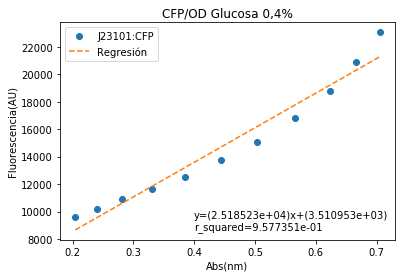

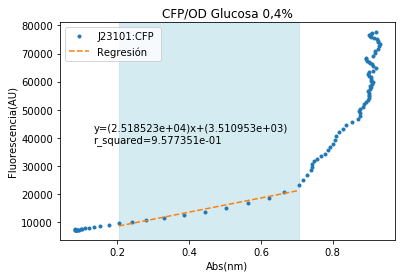

In [46]:
#Regresión lineal, evaluación de regresión con OD, gráfico de regresión (Ejemplo con CFP)
slope, intercept, r_value, p_value,std_err=stats.linregress(o,cp)
slopecp=slope
print('slope=%e'%slopecp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regcp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regcpstr=('y=(%e)x+(%e)'%(slope, intercept))
cprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('CFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,cp,'o',label='J23101:CFP')       
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')

#Delimitacion datos en CFP/OD (Ejemplo con CFP)
y1=odp[17]
y2=odp[27]
plt.figure()
plt.title('CFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,cfpp,'.',label='J23101:CFP ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


slope=1.890857e+04
intercept=1.441634e+04
p-value=6.421636e-10
r-squared: 0.987774607824
std_err=7.011969e+02
y=(1.890857e+04)x+(1.441634e+04)


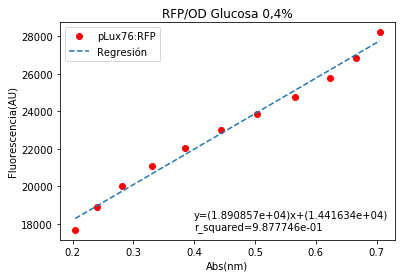

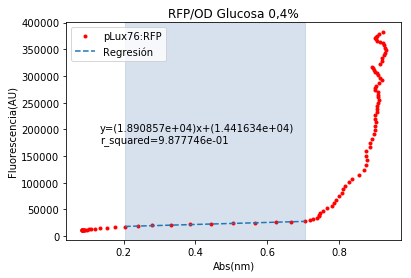

In [47]:
#RFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,rp)
sloperp=slope
print('slope=%e'%sloperp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regrp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regrpstr=('y=(%e)x+(%e)'%(slope, intercept))
rprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('RFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,rp,'ro',label='pLux76:RFP')       
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en RFP/OD
y1=odp[17]
y2=odp[27]
plt.figure()
plt.title('RFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,rfpp,'r.',label='pLux76:RFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

slope=2.956786e+04
intercept=5.161772e+03
p-value=1.210476e-10
r-squared: 0.991559435537
std_err=9.093372e+02
y=(2.956786e+04)x+(5.161772e+03)


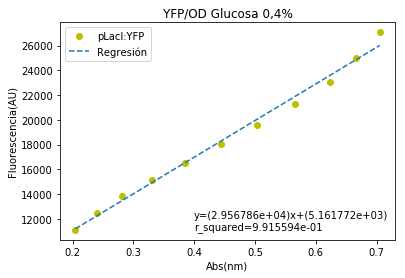

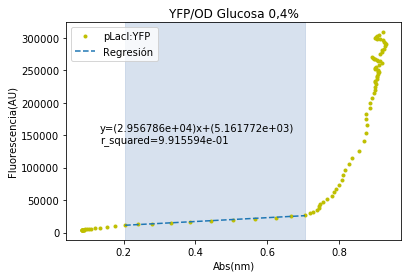

In [48]:
#YFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,yp)
slopeyp=slope
print('slope=%e'%slopeyp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regyp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regypstr=('y=(%e)x+(%e)'%(slope, intercept))
yprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('YFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,yp,'yo',label='pLacI:YFP')       
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en YFP/OD
y1=odp[17]
y2=odp[27]
plt.figure()
plt.title('YFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,yfpp,'y.',label='pLacI:YFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


In [49]:
#Selección de datos en arrays, según lo determinado
o=odp[17:28]
t=tt[17:28]
cp=cfpp[17:28]
rp=rfpp[17:28]
yp=yfpp[17:28]

#C8
o1=od1[16:28]
c1=cfp1[16:28]
r1=rfp1[16:28]
y1=yfp1[16:28]

#C9
o2=od2[15:26]
c2=cfp2[15:26]
r2=rfp2[15:26]
y2=yfp2[15:26]

#C10
o3=od3[17:27]
c3=cfp3[17:27]
r3=rfp3[17:27]
y3=yfp3[17:27]

#C11
o4=od4[17:27]
c4=cfp4[17:27]
r4=rfp4[17:27]
y4=yfp4[17:27]

#C12
o5=od5[17:29]
c5=cfp5[17:29]
r5=rfp5[17:29]
y5=yfp5[17:29]

#D8
o6=od6[15:25]
c6=cfp6[15:25]
r6=rfp6[15:25]
y6=yfp6[15:25]

#D9
o7=od7[17:28]
c7=cfp7[17:28]
r7=rfp7[17:28]
y7=yfp7[17:28]

#D10
o8=od8[18:28]
c8=cfp8[18:28]
r8=rfp8[18:28]
y8=yfp8[18:28]

#D11
o9=od9[19:30]
c9=cfp9[19:30]
r9=rfp9[19:30]
y9=yfp9[19:30]

#D12
o10=od10[23:37]
c10=cfp10[23:37]
r10=rfp10[23:37]
y10=yfp10[23:37]

#Control
oc=odc[16:27]
cc=cfpc[16:27]
rc=rfpc[16:27]
yc=yfpc[16:27]
tc=tt[16:27]

In [50]:
#regresion lineal de replicas
#C8
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,c1)
slopec1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,r1)
sloper1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,y1)
slopey1=slope

#C9
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,c2)
slopec2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,r2)
sloper2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,y2)
slopey2=slope
#C10
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,c3)
slopec3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,r3)
sloper3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,y3)
slopey3=slope
#C11
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,c4)
slopec4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,r4)
sloper4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,y4)
slopey4=slope
#C12
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,c5)
slopec5=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,r5)
sloper5=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,y5)
slopey5=slope
#D8
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,c6)
slopec6=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,r6)
sloper6=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,y6)
slopey6=slope
#D9
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,c7)
slopec7=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,r7)
sloper7=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,y7)
slopey7=slope
#D10
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,c8)
slopec8=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,r8)
sloper8=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,y8)
slopey8=slope
#D11
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,c9)
slopec9=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,r9)
sloper9=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,y9)
slopey9=slope

#D12
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,c10)
slopec10=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,r10)
sloper10=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,y10)
slopey10=slope

#Control
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,cc)
slopecc=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,rc)
sloperc=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,yc)
slopeyc=slope

ac [5409.0895016173736, 34258.195635685792, 18154.916395697765, 17889.348032151327, 14056.817125479731, 31245.760084382782, 23008.526215236783, 26956.759897529741, 18813.120981881937, 21174.67100548368, 92668.159225563344]
ar [-1500.3031932571885, 18317.834974133344, 13887.616430680975, 15248.489619310434, 16112.183445546658, 18328.813207185318, 21104.105714005382, 16209.327972797415, 13422.194623027466, 16962.638751015253, 119235.97511093483]
ay [3272.8465795671996, 32950.708078471616, 21581.764721869527, 22877.751791476883, 21675.906006400812, 31224.386306974367, 29658.924022789757, 27932.943312781994, 22354.957055370618, 25607.502508267989, 183784.5602270755]


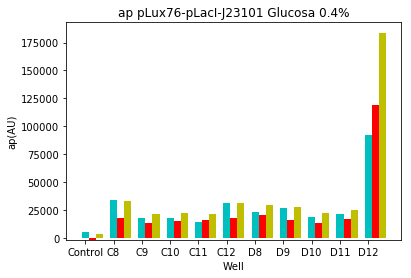

In [79]:
#Grafico de barras pendientes de FPs
pendientesc=[slopecc,slopec1,slopec2,slopec3,slopec4,slopec5,slopec6,slopec7,slopec8,slopec9,slopec10]
pendientesr=[sloperc,sloper1,sloper2,sloper3,sloper4,sloper5,sloper6,sloper7,sloper8,sloper9,sloper10]
pendientesy=[slopeyc,slopey1,slopey2,slopey3,slopey4,slopey5,slopey6,slopey7,slopey8,slopey9,slopey10]
X = np.arange(11)
plt.figure()
plt.title('ap pLux76-pLacI-J23101 Glucosa 0.4%')
plt.xlabel('Well')
plt.ylabel('ap(AU)')
plt.bar(X[0]+0.00,pendientesc[0],color='c',width=0.25)
plt.bar(X[0]+0.25,pendientesr[0],color='r',width=0.25)
plt.bar(X[0]+0.50,pendientesy[0],color='y',width=0.25)
plt.bar(X[1]+0.00,pendientesc[1],color='c',width=0.25)
plt.bar(X[1]+0.25,pendientesr[1],color='r',width=0.25)
plt.bar(X[1]+0.50,pendientesy[1],color='y',width=0.25)
plt.bar(X[2]+0.00,pendientesc[2],color='c',width=0.25)
plt.bar(X[2]+0.25,pendientesr[2],color='r',width=0.25)
plt.bar(X[2]+0.50,pendientesy[2],color='y',width=0.25)
plt.bar(X[3]+0.00,pendientesc[3],color='c',width=0.25)
plt.bar(X[3]+0.25,pendientesr[3],color='r',width=0.25)
plt.bar(X[3]+0.50,pendientesy[3],color='y',width=0.25)
plt.bar(X[4]+0.00,pendientesc[4],color='c',width=0.25)
plt.bar(X[4]+0.25,pendientesr[4],color='r',width=0.25)
plt.bar(X[4]+0.50,pendientesy[4],color='y',width=0.25)
plt.bar(X[5]+0.00,pendientesc[5],color='c',width=0.25)
plt.bar(X[5]+0.25,pendientesr[5],color='r',width=0.25)
plt.bar(X[5]+0.50,pendientesy[5],color='y',width=0.25)
plt.bar(X[6]+0.00,pendientesc[6],color='c',width=0.25)
plt.bar(X[6]+0.25,pendientesr[6],color='r',width=0.25)
plt.bar(X[6]+0.50,pendientesy[6],color='y',width=0.25)
plt.bar(X[7]+0.00,pendientesc[7],color='c',width=0.25)
plt.bar(X[7]+0.25,pendientesr[7],color='r',width=0.25)
plt.bar(X[7]+0.50,pendientesy[7],color='y',width=0.25)
plt.bar(X[8]+0.00,pendientesc[8],color='c',width=0.25)
plt.bar(X[8]+0.25,pendientesr[8],color='r',width=0.25)
plt.bar(X[8]+0.50,pendientesy[8],color='y',width=0.25)
plt.bar(X[9]+0.00,pendientesc[9],color='c',width=0.25)
plt.bar(X[9]+0.25,pendientesr[9],color='r',width=0.25)
plt.bar(X[9]+0.50,pendientesy[9],color='y',width=0.25)
plt.bar(X[10]+0.00,pendientesc[10],color='c',width=0.25)
plt.bar(X[10]+0.25,pendientesr[10],color='r',width=0.25)
plt.bar(X[10]+0.50,pendientesy[10],color='y',width=0.25)
plt.xticks(X, ['Control',"C8","C9","C10",'C11','C12','D8','D9','D10','D11','D12'])

print('ac',pendientesc)
print('ar',pendientesr)
print('ay',pendientesy)

([<matplotlib.axis.XTick at 0x1e330fc2c18>,
 <a list of 3 Text xticklabel objects>)

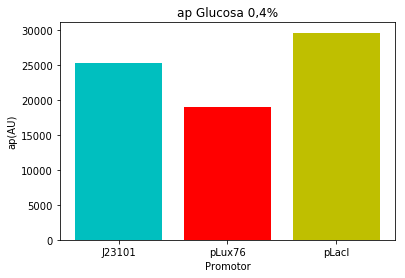

In [53]:
pendientes= [slopecp,sloperp,slopeyp]
X = [1,2,3]
plt.figure()
plt.title('ap Glucosa 0,4%')
plt.xlabel('Promotor')
plt.ylabel('ap(AU)')
plt.bar(X[0],pendientes[0],color='c')
plt.bar(X[1],pendientes[1],color='r')
plt.bar(X[2],pendientes[2],color='y')
plt.xticks(X, ["J23101",'pLux76',"pLacI"])

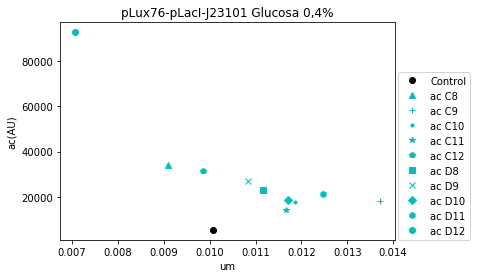

In [83]:
#grafico de ac versus Um
plt.figure()
plt.title('pLux76-pLacI-J23101 Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ac(AU)')
plt.plot(umc,slopecc,'ko',label='Control')
plt.plot(um1,slopec1,'c^',label='ac C8')
plt.plot(um2,slopec2,'c+',label='ac C9')
plt.plot(um3,slopec3,'c.',label='ac C10')
plt.plot(um4,slopec4,'c*',label='ac C11')
plt.plot(um5,slopec5,'cp',label='ac C12')
plt.plot(um6,slopec6,'cs',label='ac D8')
plt.plot(um7,slopec7,'cx',label='ac D9')
plt.plot(um8,slopec8,'cD',label='ac D10')
plt.plot(um9,slopec9,'ch',label='ac D11')
plt.plot(um10,slopec10,'co',label='ac D12')
plt.legend(loc=(1.01,0.0))

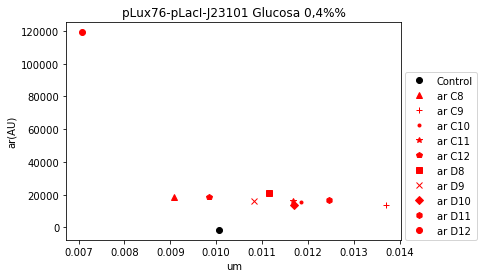

In [84]:
#grafico de ar versus Um
plt.figure()
plt.title('pLux76-pLacI-J23101 Glucosa 0,4%%')
plt.xlabel('um')
plt.ylabel('ar(AU)')
plt.plot(umc,sloperc,'ko',label='Control')
plt.plot(um1,sloper1,'r^',label='ar C8')
plt.plot(um2,sloper2,'r+',label='ar C9')
plt.plot(um3,sloper3,'r.',label='ar C10')
plt.plot(um4,sloper4,'r*',label='ar C11')
plt.plot(um5,sloper5,'rp',label='ar C12')
plt.plot(um6,sloper6,'rs',label='ar D8')
plt.plot(um7,sloper7,'rx',label='ar D9')
plt.plot(um8,sloper8,'rD',label='ar D10')
plt.plot(um9,sloper9,'rh',label='ar D11')
plt.plot(um10,sloper10,'ro',label='ar D12')
plt.legend(loc=(1.01,0.0))

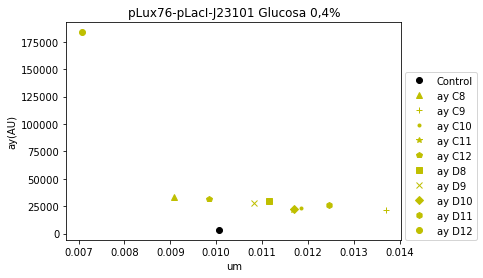

In [85]:
#grafico de ay versus Um
plt.figure()
plt.title('pLux76-pLacI-J23101 Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ay(AU)')
plt.plot(umc,slopeyc,'ko',label='Control')
plt.plot(um1,slopey1,'y^',label='ay C8')
plt.plot(um2,slopey2,'y+',label='ay C9')
plt.plot(um3,slopey3,'y.',label='ay C10')
plt.plot(um4,slopey4,'y*',label='ay C11')
plt.plot(um5,slopey5,'yp',label='ay C12')
plt.plot(um6,slopey6,'ys',label='ay D8')
plt.plot(um7,slopey7,'yx',label='ay D9')
plt.plot(um8,slopey8,'yD',label='ay D10')
plt.plot(um9,slopey9,'yh',label='ay D11')
plt.plot(um10,slopey10,'yo',label='ay D12')
plt.legend(loc=(1.01,0.0))

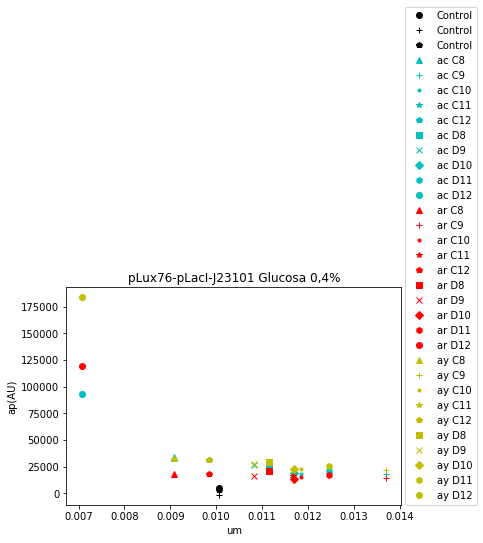

In [86]:
#grafico de ap versus Um
plt.figure()
plt.title('pLux76-pLacI-J23101 Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(umc,slopecc,'ko',label='Control')
plt.plot(umc,sloperc,'k+',label='Control')
plt.plot(umc,slopeyc,'kp',label='Control')
plt.plot(um1,slopec1,'c^',label='ac C8')
plt.plot(um2,slopec2,'c+',label='ac C9')
plt.plot(um3,slopec3,'c.',label='ac C10')
plt.plot(um4,slopec4,'c*',label='ac C11')
plt.plot(um5,slopec5,'cp',label='ac C12')
plt.plot(um6,slopec6,'cs',label='ac D8')
plt.plot(um7,slopec7,'cx',label='ac D9')
plt.plot(um8,slopec8,'cD',label='ac D10')
plt.plot(um9,slopec9,'ch',label='ac D11')
plt.plot(um10,slopec10,'co',label='ac D12')
plt.plot(um1,sloper1,'r^',label='ar C8')
plt.plot(um2,sloper2,'r+',label='ar C9')
plt.plot(um3,sloper3,'r.',label='ar C10')
plt.plot(um4,sloper4,'r*',label='ar C11')
plt.plot(um5,sloper5,'rp',label='ar C12')
plt.plot(um6,sloper6,'rs',label='ar D8')
plt.plot(um7,sloper7,'rx',label='ar D9')
plt.plot(um8,sloper8,'rD',label='ar D10')
plt.plot(um9,sloper9,'rh',label='ar D11')
plt.plot(um10,sloper10,'ro',label='ar D12')
plt.plot(um1,slopey1,'y^',label='ay C8')
plt.plot(um2,slopey2,'y+',label='ay C9')
plt.plot(um3,slopey3,'y.',label='ay C10')
plt.plot(um4,slopey4,'y*',label='ay C11')
plt.plot(um5,slopey5,'yp',label='ay C12')
plt.plot(um6,slopey6,'ys',label='ay D8')
plt.plot(um7,slopey7,'yx',label='ay D9')
plt.plot(um8,slopey8,'yD',label='ay D10')
plt.plot(um9,slopey9,'yh',label='ay D11')
plt.plot(um10,slopey10,'yo',label='ay D12')
plt.legend(loc=(1.01,0.0))

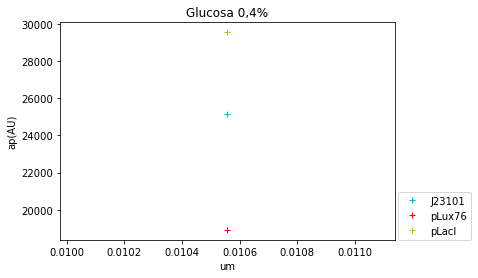

In [58]:
#grafico de ay versus Um
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(um,slopecp,'c+',label='J23101')
plt.plot(um,sloperp,'r+',label='pLux76')
plt.plot(um,slopeyp,'y+',label='pLacI')
plt.legend(loc=(1.01,0.0))

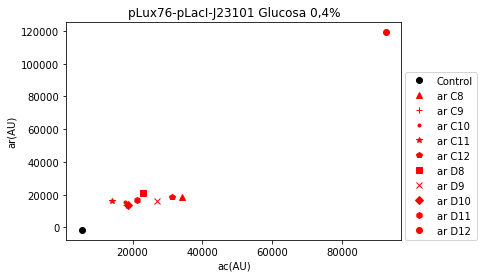

In [87]:
#grafico de ar versus ac
plt.figure()
plt.title('pLux76-pLacI-J23101 Glucosa 0,4%')
plt.xlabel('ac(AU)')
plt.ylabel('ar(AU)')
plt.plot(slopecc,sloperc,'ko',label='Control')
plt.plot(slopec1,sloper1,'r^',label='ar C8')
plt.plot(slopec2,sloper2,'r+',label='ar C9')
plt.plot(slopec3,sloper3,'r.',label='ar C10')
plt.plot(slopec4,sloper4,'r*',label='ar C11')
plt.plot(slopec5,sloper5,'rp',label='ar C12')
plt.plot(slopec6,sloper6,'rs',label='ar D8')
plt.plot(slopec7,sloper7,'rx',label='ar D9')
plt.plot(slopec8,sloper8,'rD',label='ar D10')
plt.plot(slopec9,sloper9,'rh',label='ar D11')
plt.plot(slopec10,sloper10,'ro',label='ar D12')
plt.legend(loc=(1.01,0.0))

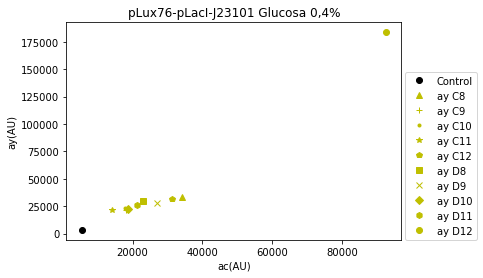

In [88]:
#grafico de ay versus ac
plt.figure()
plt.title('pLux76-pLacI-J23101 Glucosa 0,4%')
plt.xlabel('ac(AU)')
plt.ylabel('ay(AU)')
plt.plot(slopecc,slopeyc,'ko',label='Control')
plt.plot(slopec1,slopey1,'y^',label='ay C8')
plt.plot(slopec2,slopey2,'y+',label='ay C9')
plt.plot(slopec3,slopey3,'y.',label='ay C10')
plt.plot(slopec4,slopey4,'y*',label='ay C11')
plt.plot(slopec5,slopey5,'yp',label='ay C12')
plt.plot(slopec6,slopey6,'ys',label='ay D8')
plt.plot(slopec7,slopey7,'yx',label='ay D9')
plt.plot(slopec8,slopey8,'yD',label='ay D10')
plt.plot(slopec9,slopey9,'yh',label='ay D11')
plt.plot(slopec10,slopey10,'yo',label='ay D12')
plt.legend(loc=(1.01,0.0))

um [0.010064966581991649, 0.0090809839863090769, 0.013704731336886621, 0.011852532204990565, 0.011667007179076982, 0.0098535770948626599, 0.011157440515075079, 0.010836172910033439, 0.011697983271085547, 0.012466976315230329, 0.0070679183887933181]


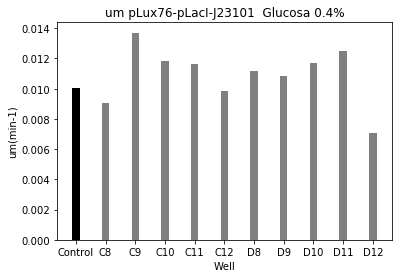

In [77]:
#Grafico de barras um de FPs
ums=[umc,um1,um2,um3,um4,um5,um6,um7,um8,um9,um10]
X = np.arange(11)
plt.figure()
plt.title('um pLux76-pLacI-J23101  Glucosa 0.4%')
plt.xlabel('Well')
plt.ylabel('um(min-1)')
plt.bar(X[0]+0.00,ums[0],color='k',width=0.25)
plt.bar(X[1]+0.00,ums[1],color='grey',width=0.25)
plt.bar(X[2]+0.00,ums[2],color='grey',width=0.25)
plt.bar(X[3]+0.00,ums[3],color='grey',width=0.25)
plt.bar(X[4]+0.00,ums[4],color='grey',width=0.25)
plt.bar(X[5]+0.00,ums[5],color='grey',width=0.25)
plt.bar(X[6]+0.00,ums[6],color='grey',width=0.25)
plt.bar(X[7]+0.00,ums[7],color='grey',width=0.25)
plt.bar(X[8]+0.00,ums[8],color='grey',width=0.25)
plt.bar(X[9]+0.00,ums[9],color='grey',width=0.25)
plt.bar(X[10]+0.00,ums[10],color='grey',width=0.25)
plt.xticks(X, ['Control',"C8","C9","C10",'C11','C12','D8','D9','D10','D11','D12'])
print('um',ums)

In [62]:
#Calculo de ro para cada réplica
pendientesc=[slopecp,slopecc,slopec1,slopec2,slopec3,slopec4,slopec5,slopec6,slopec7,slopec8,slopec9,slopec10]
pendientesr=[sloperp,sloperc,sloper1,sloper2,sloper3,sloper4,sloper5,sloper6,sloper7,sloper8,sloper9,sloper10]
pendientesy=[slopeyp,slopeyc,slopey1,slopey2,slopey3,slopey4,slopey5,slopey6,slopey7,slopey8,slopey9,slopey10]
#Ro RFP 
pr1=sloper1/slopec1
pr2=sloper2/slopec2
pr3=sloper3/slopec3
pr4=sloper4/slopec4
pr5=sloper5/slopec5
pr6=sloper6/slopec6
pr7=sloper7/slopec7
pr8=sloper8/slopec8
pr9=sloper9/slopec9
pr10=sloper10/slopec10
prp=sloperp/slopecp
prc=sloperc/slopecc

#Ro YFP
py1=slopey1/slopec1
py2=slopey2/slopec2
py3=slopey3/slopec3
py4=slopey4/slopec4
py5=slopey5/slopec5
py6=slopey6/slopec6
py7=slopey7/slopec7
py8=slopey8/slopec8
py9=slopey9/slopec9
py10=slopey10/slopec10
pyp=slopeyp/slopecp
pyc=slopeyc/slopecc

ro_rfp=[prc,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10]
ro_yfp=[pyc,py1,py2,py3,py4,py5,py6,py7,py8,py9,py10]


pr [-0.27736704907703641, 0.53469935103797983, 0.76495072342894255, 0.85237816335762184, 1.1462184719143369, 0.58660161115256093, 0.91722979197293175, 0.60130846713082908, 0.71344858920291709, 0.8010815727253745, 1.2866984313425589]
py [0.60506423097428585, 0.96183431342623882, 1.1887559408967499, 1.2788477115186216, 1.5420209150413242, 0.99931594631237353, 1.2890405819712574, 1.0362129357891305, 1.1882641416540967, 1.209345944578611, 1.9832546773668607]


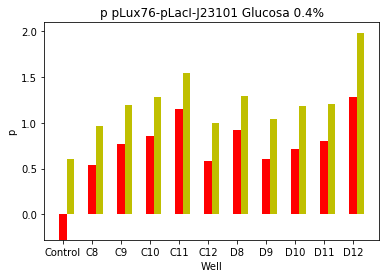

In [76]:
#grafico ro de yfp y de rfp
ro_rfp=[prc,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10]
ro_yfp=[pyc,py1,py2,py3,py4,py5,py6,py7,py8,py9,py10]
X = np.arange(11)
plt.figure()
plt.title('p pLux76-pLacI-J23101 Glucosa 0.4%')
plt.xlabel('Well')
plt.ylabel('p')
plt.bar(X[0]+0.00,ro_rfp[0],color='r',width=0.25)
plt.bar(X[0]+0.25,ro_yfp[0],color='y',width=0.25)
plt.bar(X[1]+0.00,ro_rfp[1],color='r',width=0.25)
plt.bar(X[1]+0.25,ro_yfp[1],color='y',width=0.25)
plt.bar(X[2]+0.00,ro_rfp[2],color='r',width=0.25)
plt.bar(X[2]+0.25,ro_yfp[2],color='y',width=0.25)
plt.bar(X[3]+0.00,ro_rfp[3],color='r',width=0.25)
plt.bar(X[3]+0.25,ro_yfp[3],color='y',width=0.25)
plt.bar(X[4]+0.00,ro_rfp[4],color='r',width=0.25)
plt.bar(X[4]+0.25,ro_yfp[4],color='y',width=0.25)
plt.bar(X[5]+0.00,ro_rfp[5],color='r',width=0.25)
plt.bar(X[5]+0.25,ro_yfp[5],color='y',width=0.25)
plt.bar(X[6]+0.00,ro_rfp[6],color='r',width=0.25)
plt.bar(X[6]+0.25,ro_yfp[6],color='y',width=0.25)
plt.bar(X[7]+0.00,ro_rfp[7],color='r',width=0.25)
plt.bar(X[7]+0.25,ro_yfp[7],color='y',width=0.25)
plt.bar(X[8]+0.00,ro_rfp[8],color='r',width=0.25)
plt.bar(X[8]+0.25,ro_yfp[8],color='y',width=0.25)
plt.bar(X[9]+0.00,ro_rfp[9],color='r',width=0.25)
plt.bar(X[9]+0.25,ro_yfp[9],color='y',width=0.25)
plt.bar(X[10]+0.00,ro_rfp[10],color='r',width=0.25)
plt.bar(X[10]+0.25,ro_yfp[10],color='y',width=0.25)
plt.xticks(X, ['Control',"C8","C9","C10",'C11','C12','D8','D9','D10','D11','D12'])

print('pr',ro_rfp)
print('py',ro_yfp)

A=2.418634e+00
um=9.080984e-03
l=1.491333e+02


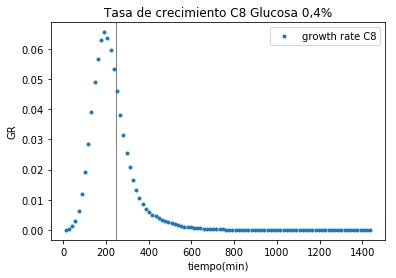

In [64]:
#tasa de crecimiento
#C8
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))
y1=((A1*np.exp(-np.exp((((um1*np.exp(1))/A1)*(l1-tt))+1))))
#Con diff
dy1=(1/od1[:-1])*(np.diff(y1)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento C8 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm1,tm1, color='k', alpha=0.5)
plt.plot(tt[:-1],dy1,'.',label='growth rate C8')
plt.legend(loc='upper right')

A=2.426549e+00
um=1.370473e-02
l=1.658836e+02


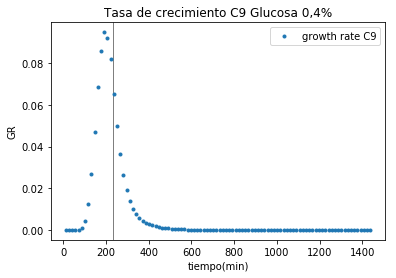

In [65]:
#tasa de crecimiento
#C9
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))
y2=((A2*np.exp(-np.exp((((um2*np.exp(1))/A2)*(l2-tt))+1))))
#Con diff
dy2=(1/od2[:-1])*(np.diff(y2)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento C9 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm2,tm2, color='k', alpha=0.5)
plt.plot(tt[:-1],dy2,'.',label='growth rate C9')
plt.legend(loc='upper right')

A=2.439706e+00
um=1.185253e-02
l=1.911958e+02


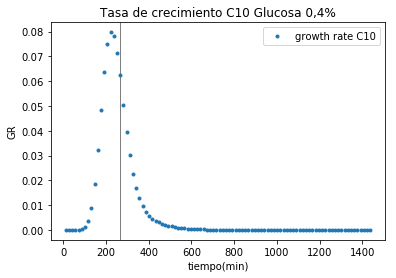

In [66]:
#tasa de crecimiento
#C10
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))
y3=((A3*np.exp(-np.exp((((um3*np.exp(1))/A3)*(l3-tt))+1))))
#Con diff
dy3=(1/od3[:-1])*(np.diff(y3)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento C10 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm3,tm3, color='k', alpha=0.5)
plt.plot(tt[:-1],dy3,'.',label='growth rate C10')
plt.legend(loc='upper right')

A=2.493239e+00
um=1.166701e-02
l=1.875478e+02


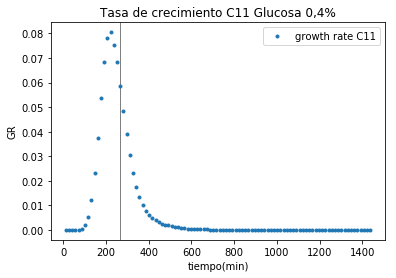

In [67]:
#tasa de crecimiento
#C11
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))
y4=((A4*np.exp(-np.exp((((um4*np.exp(1))/A4)*(l4-tt))+1))))
#Con diff
dy4=(1/od4[:-1])*(np.diff(y4)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento C11 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm4,tm4, color='k', alpha=0.5)
plt.plot(tt[:-1],dy4,'.',label='growth rate C11')
plt.legend(loc='upper right')

A=2.472352e+00
um=9.853577e-03
l=1.700683e+02


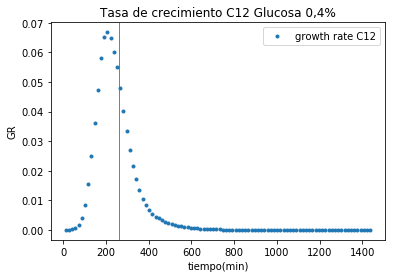

In [68]:
#tasa de crecimiento
#C12
print('A=%e'%(A5))
print('um=%e'%(um5))
print('l=%e'%(l5))
y5=((A5*np.exp(-np.exp((((um5*np.exp(1))/A5)*(l5-tt))+1))))
#Con diff
dy5=(1/od5[:-1])*(np.diff(y5)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento C12 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm5,tm5, color='k', alpha=0.5)
plt.plot(tt[:-1],dy5,'.',label='growth rate C12')
plt.legend(loc='upper right')

A=2.451442e+00
um=1.115744e-02
l=1.478715e+02


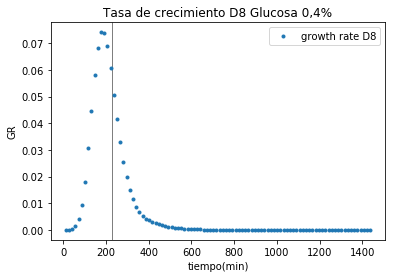

In [69]:
#tasa de crecimiento
#D8
print('A=%e'%(A6))
print('um=%e'%(um6))
print('l=%e'%(l6))
y6=((A6*np.exp(-np.exp((((um6*np.exp(1))/A6)*(l6-tt))+1))))
#Con diff
dy6=(1/od6[:-1])*(np.diff(y6)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento D8 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm6,tm6, color='k', alpha=0.5)
plt.plot(tt[:-1],dy6,'.',label='growth rate D8')
plt.legend(loc='upper right')

A=2.299987e+00
um=1.083617e-02
l=1.822579e+02


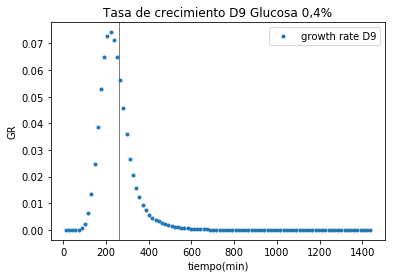

In [70]:
#tasa de crecimiento
#D9
print('A=%e'%(A7))
print('um=%e'%(um7))
print('l=%e'%(l7))
y7=((A7*np.exp(-np.exp((((um7*np.exp(1))/A7)*(l7-tt))+1))))
#Con diff
dy7=(1/od7[:-1])*(np.diff(y7)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento D9 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm7,tm7, color='k', alpha=0.5)
plt.plot(tt[:-1],dy7,'.',label='growth rate D9')
plt.legend(loc='upper right')

A=2.451441e+00
um=1.169798e-02
l=1.975160e+02


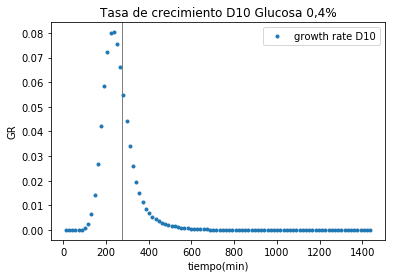

In [71]:
#tasa de crecimiento
#D10
print('A=%e'%(A8))
print('um=%e'%(um8))
print('l=%e'%(l8))
y8=((A8*np.exp(-np.exp((((um8*np.exp(1))/A8)*(l8-tt))+1))))
#Con diff
dy8=(1/od8[:-1])*(np.diff(y8)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento D10 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm8,tm8, color='k', alpha=0.5)
plt.plot(tt[:-1],dy8,'.',label='growth rate D10')
plt.legend(loc='upper right')

A=2.358406e+00
um=1.246698e-02
l=2.176350e+02


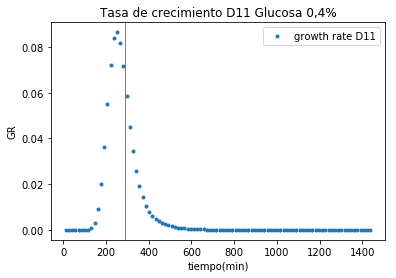

In [72]:
#tasa de crecimiento
#D11
print('A=%e'%(A9))
print('um=%e'%(um9))
print('l=%e'%(l9))
y9=((A9*np.exp(-np.exp((((um9*np.exp(1))/A9)*(l9-tt))+1))))
#Con diff
dy9=(1/od9[:-1])*(np.diff(y9)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento D11 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm9,tm9, color='k', alpha=0.5)
plt.plot(tt[:-1],dy9,'.',label='growth rate D11')
plt.legend(loc='upper right')

A=1.735691e+00
um=7.067918e-03
l=2.642550e+02


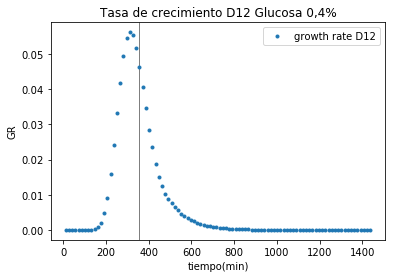

In [73]:
#tasa de crecimiento
#D12
print('A=%e'%(A10))
print('um=%e'%(um10))
print('l=%e'%(l10))
y10=((A10*np.exp(-np.exp((((um10*np.exp(1))/A10)*(l10-tt))+1))))
#Con diff
dy10=(1/od10[:-1])*(np.diff(y10)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento D12 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm10,tm10, color='k', alpha=0.5)
plt.plot(tt[:-1],dy10,'.',label='growth rate D12')
plt.legend(loc='upper right')

A=2.279870e+00
um=1.006497e-02
l=1.556934e+02


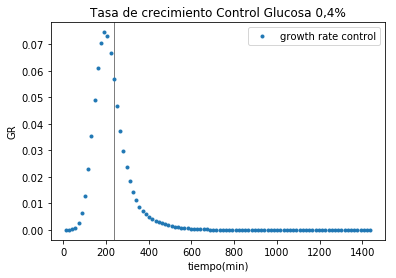

In [74]:
#tasa de crecimiento
#control
print('A=%e'%(Ac))
print('um=%e'%(umc))
print('l=%e'%(lc))
yc=((Ac*np.exp(-np.exp((((umc*np.exp(1))/Ac)*(lc-tt))+1))))
#Con diff
dyc=(1/odc[:-1])*(np.diff(yc)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento Control Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tmc,tmc, color='k', alpha=0.5)
plt.plot(tt[:-1],dyc,'.',label='growth rate control')
plt.legend(loc='upper right')

A=2.372549e+00
um=1.055784e-02
l=1.761374e+02


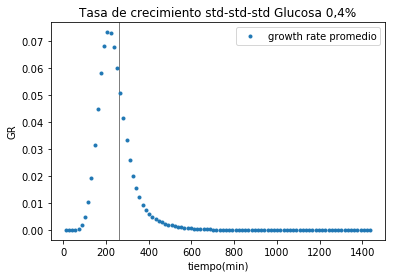

In [75]:
#tasa de crecimiento
#promedio
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))
y=((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-tt))+1))))
#Con diff
dy=(1/odp[:-1])*(np.diff(y)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento std-std-std Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm,tm, color='k', alpha=0.5)
plt.plot(tt[:-1],dy,'.',label='growth rate promedio')
plt.legend(loc='upper right')

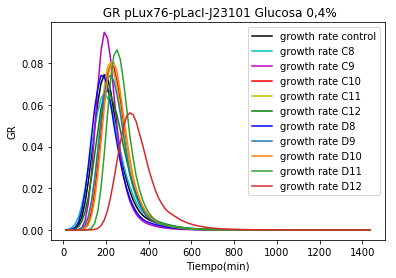

In [82]:
plt.figure()
plt.title(' GR pLux76-pLacI-J23101 Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('GR')
plt.plot(tt[:-1],dyc,'k',label='growth rate control')
plt.plot(tt[:-1],dy1,'c',label='growth rate C8')
plt.plot(tt[:-1],dy2,'m',label='growth rate C9')
plt.plot(tt[:-1],dy3,'r',label='growth rate C10')
plt.plot(tt[:-1],dy4,'y',label='growth rate C11')
plt.plot(tt[:-1],dy5,'g',label='growth rate C12')
plt.plot(tt[:-1],dy6,'b',label='growth rate D8')
plt.plot(tt[:-1],dy7,label='growth rate D9')
plt.plot(tt[:-1],dy8,label='growth rate D10')
plt.plot(tt[:-1],dy9,label='growth rate D11')
plt.plot(tt[:-1],dy10,label='growth rate D12')
plt.legend(loc='upper right')

In [89]:
#tasas de síntesis para replicas contra od y tiempo
dt=np.diff(tt)
#C3
dc1=np.diff(cfp1)
dr1=np.diff(rfp1)
dy1=np.diff(yfp1)
#C4
dc2=np.diff(cfp2)
dr2=np.diff(rfp2)
dy2=np.diff(yfp2)
#C5
dc3=np.diff(cfp3)
dr3=np.diff(rfp3)
dy3=np.diff(yfp3)
#C6
dc4=np.diff(cfp4)
dr4=np.diff(rfp4)
dy4=np.diff(yfp4)
#C7
dc5=np.diff(cfp5)
dr5=np.diff(rfp5)
dy5=np.diff(yfp5)
#D3
dc6=np.diff(cfp6)
dr6=np.diff(rfp6)
dy6=np.diff(yfp6)
#D4
dc7=np.diff(cfp7)
dr7=np.diff(rfp7)
dy7=np.diff(yfp7)
#D5
dc8=np.diff(cfp8)
dr8=np.diff(rfp8)
dy8=np.diff(yfp8)
#D6
dc9=np.diff(cfp9)
dr9=np.diff(rfp9)
dy9=np.diff(yfp9)
#D7
dc10=np.diff(cfp10)
dr10=np.diff(rfp10)
dy10=np.diff(yfp10)
#PROMEDIO
dcp=np.diff(cfpp)
drp=np.diff(rfpp)
dyp=np.diff(yfpp)
#CONTROL
dcc=np.diff(cfpc)
drc=np.diff(rfpc)
dyc=np.diff(yfpc)
